In [3]:
import torch

## 텐서 초기화와 데이터 타입

### 초기화 되지 않은 텐서
- 값이 없는 empty tensor
    - 0에 가까운 아주 작은 값이 할당됨

In [7]:
x = torch.empty(4,2)
x

tensor([[8.4078e-45, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [1.8754e+28, 1.0153e-08]])

### 무작위로 초기화된 텐서

In [8]:
x = torch.rand(4,2)
x

tensor([[0.3586, 0.8730],
        [0.4615, 0.1448],
        [0.8230, 0.8729],
        [0.1713, 0.8455]])

### dtype = long이고, 0으로 채워진 텐서

In [9]:
x = torch.zeros(4,2, dtype=torch.long)
x

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])

### 텐서에 사용자 입력값 할당

In [10]:
x = torch.tensor([3, 2.3], dtype=torch.float)
x

tensor([3.0000, 2.3000])

In [11]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-0.3668])
-0.366769015789032
torch.float32


## GPU 사용

In [34]:
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
print(f'device: {device}')

y = torch.ones_like(x, device=device)
print(f'y: {y}')

x = x.to(device=device)
print(f'x: {x}')

z = x+y
print(f'z: {z}')
print(z.to('cpu', torch.float32))

device: mps
y: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], device='mps:0')
x: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], device='mps:0', grad_fn=<ToCopyBackward0>)
z: tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]], device='mps:0', grad_fn=<AddBackward0>)
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]], grad_fn=<ToCopyBackward0>)


/opt/homebrew/lib/python3.9/site-packages/torch/_tensor_str.py:103: UserWarning: The operator 'aten::bitwise_and.Tensor_out' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at  /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:11.)
  nonzero_finite_vals = torch.masked_select(tensor_view, torch.isfinite(tensor_view) & tensor_view.ne(0))


## 다차원 텐서 표현

### 0D tensor
- scalar, 숫자 하나
- rank = 0
- 축, 형상 없음

In [14]:
t0 = torch.tensor(0)
print(f't0 dim: {t0.ndim}')
print(f't0 shape: {t0.shape}')

t0 dim: 0
t0 shape: torch.Size([])


### 1D tensor
- vector, 리스트와 비슷한 형태
- rank = 1
- 한 개의 축

In [15]:
t1 = torch.tensor([1,2,3])
print(f't1 dim: {t1.ndim}')
print(f't1 shape: {t1.shape}')

t1 dim: 1
t1 shape: torch.Size([3])


### 2D tensor
- matrix, dataframe이 대부분 이런 형태
- rank = 2
- has rows, columns

In [20]:
t2 = torch.tensor([[1,2,3],
                   [4,5,6]])
print(f't2 dim: {t2.ndim}')
print(f't2 shape: {t2.shape}')

t2 dim: 2
t2 shape: torch.Size([2, 3])


### 3D tensor
- combination of matrices
- rank = 3
- 흑백 이미지는 3D tensor로 표현 가능
    - pure white = 256, pure black = 0 일 때,
    - 0 - 256 사이의 값으로 이미지 픽셀 표현 가능
- shape은 밖에서 안으로 들어오는 형태로 표현됨

In [21]:
t3 = torch.tensor([[[1,2,3],
                    [4,5,6],
                    [7,8,9]],
                  
                   [[1,2,3],
                    [4,5,6],
                    [7,8,9]]])
print(f't3 dim: {t3.ndim}')
print(f't3 shape: {t3.shape}')

t3 dim: 3
t3 shape: torch.Size([2, 3, 3])


### 4D tensor
- combination of 3D tensors
- classic e.g. is color images

## 텐서의 연산

In [23]:
import math

a = torch.randn(3, 2)
print(f'a: {a}')

a * 2

a: tensor([[-1.0485,  0.4275],
        [-0.8730,  0.2790],
        [ 1.6914,  0.4224]])


tensor([[-2.0971,  0.8550],
        [-1.7460,  0.5580],
        [ 3.3828,  0.8448]])

In [27]:
print(torch.min(a))
print(torch.max(a))
print(torch.mean(a))

tensor(-1.0485)
tensor(1.6914)
tensor(0.1498)


min, max에 dim 인자를 줄 경우 argmin, argmax도 함께 리턴
- argmin, argmax: 최소값, 최대값을 가진 인덱스
- dim = 0: column wise calculation
- dim = 1: row wise calculation

In [33]:
print(a, '\n')
print(f'a.min(dim=0): {a.min(dim=0)}\n')
print(f'a.max(dim=1): {a.max(dim=1)}')

tensor([[-1.0485,  0.4275],
        [-0.8730,  0.2790],
        [ 1.6914,  0.4224]]) 

a.min(dim=0): torch.return_types.min(
values=tensor([-1.0485,  0.2790]),
indices=tensor([0, 1]))

a.max(dim=1): torch.return_types.max(
values=tensor([0.4275, 0.2790, 1.6914]),
indices=tensor([1, 1, 0]))


## 텐서의 조작

### view
- 텐서의 형태 변경할 때 사용
- -1 값을 주면 해당 부분은 적당한 형태로 만들어줌

In [35]:
x = torch.randn(4,5)
print(f'x:\n{x}\n')
print(f'x.view(20):\n{x.view(20)}\n')
print(f'x.view(5,-1):\n{x.view(5,-1)}')

x:
tensor([[-1.8391,  1.8208, -0.3182,  2.8753, -0.0398],
        [-0.4582, -1.1158, -0.1244, -0.0500, -0.0336],
        [ 0.3228, -1.5643, -0.3640,  1.2103, -0.4357],
        [-1.2618, -1.9523,  1.6268, -0.6153,  0.3427]])

x.view(20):
tensor([-1.8391,  1.8208, -0.3182,  2.8753, -0.0398, -0.4582, -1.1158, -0.1244,
        -0.0500, -0.0336,  0.3228, -1.5643, -0.3640,  1.2103, -0.4357, -1.2618,
        -1.9523,  1.6268, -0.6153,  0.3427])

x.view(5,-1):
tensor([[-1.8391,  1.8208, -0.3182,  2.8753],
        [-0.0398, -0.4582, -1.1158, -0.1244],
        [-0.0500, -0.0336,  0.3228, -1.5643],
        [-0.3640,  1.2103, -0.4357, -1.2618],
        [-1.9523,  1.6268, -0.6153,  0.3427]])


### sqeeze
- 텐서의 차원 제거(축소)

In [42]:
a = torch.randn(1,3,3)
print(f'a:\n{a}')
print(f'a shape: {a.shape}\n')

print(f'a squeezed:\n{a.squeeze()}')
print(f'a squeezed shape: {a.squeeze().shape}')

a:
tensor([[[ 0.2047,  0.3855,  0.8584],
         [-0.9254, -2.2748, -0.3804],
         [-0.3570,  0.1975, -0.2954]]])
a shape: torch.Size([1, 3, 3])

a squeezed:
tensor([[ 0.2047,  0.3855,  0.8584],
        [-0.9254, -2.2748, -0.3804],
        [-0.3570,  0.1975, -0.2954]])
a squeezed shape: torch.Size([3, 3])


### unsqeeze
- 텐서의 차원 추가
- dim 인자에 따라 추가되는 형태 결정

In [50]:
b = torch.randn(3,3)
print(f'b:\n{b}\n')

print(f'b.unsqueeze(dim=0):\n{b.unsqueeze(dim=0)}\n')
print(f'b.unsqueeze(dim=1):\n{b.unsqueeze(dim=1)}\n')
print(f'b.unsqueeze(dim=2):\n{b.unsqueeze(dim=2)}')

b:
tensor([[-0.6152, -1.0412, -0.4704],
        [ 1.4376,  0.9839, -0.0252],
        [-1.8376, -0.4946, -0.1200]])

b.unsqueeze(dim=0):
tensor([[[-0.6152, -1.0412, -0.4704],
         [ 1.4376,  0.9839, -0.0252],
         [-1.8376, -0.4946, -0.1200]]])

b.unsqueeze(dim=1):
tensor([[[-0.6152, -1.0412, -0.4704]],

        [[ 1.4376,  0.9839, -0.0252]],

        [[-1.8376, -0.4946, -0.1200]]])

b.unsqueeze(dim=2):
tensor([[[-0.6152],
         [-1.0412],
         [-0.4704]],

        [[ 1.4376],
         [ 0.9839],
         [-0.0252]],

        [[-1.8376],
         [-0.4946],
         [-0.1200]]])


### chunk
- 텐서 나누기

In [55]:
t = torch.randn(3, 6)
print(f't:\n{t}')
print(f't shape: {t.shape}\n')

t1, t2, t3 = torch.chunk(input=t, chunks=3, dim=0)
print(f't1:\n{t1}\n')
print(f't2:\n{t2}\n')
print(f't3:\n{t3}\n')

t:
tensor([[ 0.0571, -0.5945,  1.0924,  0.8121,  0.5004,  0.3048],
        [-1.5583,  1.3497, -1.1490,  0.0355, -1.4978,  0.3207],
        [-0.2642,  0.7745, -0.3257,  0.4762,  0.7046,  1.5231]])
t shape: torch.Size([3, 6])

t1:
tensor([[ 0.0571, -0.5945,  1.0924,  0.8121,  0.5004,  0.3048]])

t2:
tensor([[-1.5583,  1.3497, -1.1490,  0.0355, -1.4978,  0.3207]])

t3:
tensor([[-0.2642,  0.7745, -0.3257,  0.4762,  0.7046,  1.5231]])



In [57]:
t = torch.randn(3, 6)
print(f't:\n{t}')
print(f't shape: {t.shape}\n')

t1, t2, t3 = torch.chunk(input=t, chunks=3, dim=1)
print(f't1:\n{t1}\n')
print(f't2:\n{t2}\n')
print(f't3:\n{t3}\n')

t:
tensor([[-1.2711, -0.8716, -1.3532,  0.6647,  0.3176, -0.8574],
        [ 0.6044, -0.8736, -0.3142,  0.2563,  0.4859,  0.5440],
        [-1.0335, -0.9162, -0.6500, -1.2590, -0.7080, -0.2232]])
t shape: torch.Size([3, 6])

t1:
tensor([[-1.2711, -0.8716],
        [ 0.6044, -0.8736],
        [-1.0335, -0.9162]])

t2:
tensor([[-1.3532,  0.6647],
        [-0.3142,  0.2563],
        [-0.6500, -1.2590]])

t3:
tensor([[ 0.3176, -0.8574],
        [ 0.4859,  0.5440],
        [-0.7080, -0.2232]])



### split
- 텐서 나누기

In [8]:
t = torch.randn(3, 6)
print(f't:\n{t}')
print(f't shape: {t.shape}\n')

t1, t2 = torch.split(tensor=t, split_size_or_sections=3, dim=1)
print(f't1:\n{t1}\n')
print(f't2:\n{t2}\n')
# print(f't3:\n{t3}\n')

t:
tensor([[ 0.7273, -0.4271,  0.6636, -1.2901, -0.0281,  0.0121],
        [-1.7035, -1.5388, -0.9028, -0.7766, -2.1420,  0.6513],
        [-0.9461,  0.4016, -1.4053, -0.4333, -0.1167, -0.8599]])
t shape: torch.Size([3, 6])

t1:
tensor([[ 0.7273, -0.4271,  0.6636],
        [-1.7035, -1.5388, -0.9028],
        [-0.9461,  0.4016, -1.4053]])

t2:
tensor([[-1.2901, -0.0281,  0.0121],
        [-0.7766, -2.1420,  0.6513],
        [-0.4333, -0.1167, -0.8599]])



## Autograd(자동미분)
- 텐서의 모든 연산에 대해 자동미분 기능
- 역전파 정의할 때 사용

In [9]:
a = torch.randn(3, 3)
a = a*3
print(f'a:\n{a}')
print(a.requires_grad)

a:
tensor([[-5.4157e+00, -2.7539e+00, -1.5230e+00],
        [-1.9505e-01, -1.3152e+00, -5.3721e-03],
        [ 1.6154e+00, -6.5643e-01,  2.5839e+00]])
False


In [11]:
# torch에서 메소드 뒤에 언더바가 붙으면 보통 inplace연산임
a.requires_grad_(True)
print(a.requires_grad)

True


In [12]:
b = (a*a).sum()
print(f'b: {b}')
print(b.grad_fn)

b: 50.71821975708008


## Gradient

처음에 requires_grad=True로 설정하고 이후 연산을 수행하면 grad_fn에 AddBackward가 기록됨을 볼 수 있음

In [23]:
x = torch.ones(3,3, requires_grad=True)
x

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)

In [24]:
y = x+5
y

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)

In [25]:
z = y*y
out = z.mean()
print(z)
print(out)

tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>)
tensor(36., grad_fn=<MeanBackward0>)


In [26]:
print(out.backward())

None


In [29]:
print(f'x:\n{x}')
print(f'x.grad:\n{x.grad}')

x:
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
x.grad:
tensor([[1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333]])


## pytorch 실전 분석

In [31]:
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision import datasets

### MNIST

In [32]:
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize(mean=(0.5,), std=(1.0,))])

In [33]:
trainset = datasets.MNIST(root='../torch_youtube/data/',
                          train=True, download=True,
                          transform=mnist_transform)

testset = datasets.MNIST(root='./data/',
                         train=False, download=True,
                         transform=mnist_transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../torch_youtube/data/MNIST/raw/train-images-idx3-ubyte.gz to ../torch_youtube/data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../torch_youtube/data/MNIST/raw/train-labels-idx1-ubyte.gz to ../torch_youtube/data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../torch_youtube/data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../torch_youtube/data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../torch_youtube/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../torch_youtube/data/MNIST/raw



DataLoader는 데이터 전체를 보관했다가 모델을 실제로 학습할 때 batch_size 크기만큼 데이터 가져옴

In [35]:
train_loader = DataLoader(dataset=trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(dataset=testset, batch_size=8, shuffle=False, num_workers=2)

In [116]:
data_iter = iter(train_loader)
imgs, labels = data_iter.next()

print(imgs.shape) # [8, 1, 28, 28] 의미: 28*28 이미지, 1=흑백(3=컬러, RGB), 8장(=batch_size)
print(labels.shape)

torch.Size([8, 1, 28, 28])
torch.Size([8])


In [117]:
torch_img = torch.squeeze(imgs[0])
torch_img.shape

torch.Size([28, 28])

In [120]:
a = torch.randint(len(trainset), size=(1, )).item()
trainset[a]

(tensor([[[-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000],
          [-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000],
          [-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000],
          [-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.500

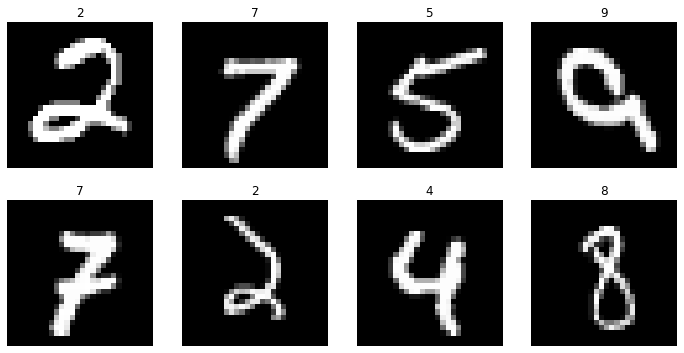

In [122]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 6))
cols, rows = 4, 2

for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(trainset), size=(1, )).item()
    
    # mnist dataset은 ([이미지 정보], 레이블) 이런 형태의 튜플로 저장되어 있음
    # 따라서 이미지정보, 레이블값 따로 불러옴
    img, label = trainset[sample_idx]
    
    fig.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
    
plt.show()

## 신경망 구성

- layer: 신경망의 핵심 구조로 텐서를 입력받아 텐서를 출력함
- module: layer가 모여서 구성
- model: module이 모여서 구성

### torch.nn
주로 weights, bias 값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때 사용 (weight 값은 직접 선언하지 않고 자동으로 계산됨)

In [123]:
import torch.nn as nn

#### nn.Linear

In [126]:
input = torch.randn(128, 20)
print(f'input:\n{input}')
print(f'input size: {input.size()}\n')

model = nn.Linear(20, 30)
print(f'model:\n{model}\n')

output = model(input)
print(f'output:\n{output}')
print(f'output size: {output.size()}')

input:
tensor([[-1.1413, -0.0560,  1.5468,  ...,  0.1221,  1.3220,  0.7786],
        [ 0.1568,  0.1488,  0.9209,  ..., -0.1339, -0.8807,  0.3387],
        [-0.3590, -0.7366, -0.1491,  ...,  0.9899, -0.1290,  2.0200],
        ...,
        [ 2.3308, -0.5938, -0.1984,  ...,  1.9948,  0.5858, -0.5360],
        [ 1.3363, -1.5294, -1.5316,  ...,  0.1692,  1.4101,  2.6875],
        [-1.0685, -1.7830, -1.2037,  ...,  1.3241,  1.1119, -0.5513]])
input size: torch.Size([128, 20])

model:
Linear(in_features=20, out_features=30, bias=True)

output:
tensor([[ 0.6356,  0.6784, -0.3312,  ..., -0.0520,  0.0157,  0.4639],
        [-0.9723,  0.0430,  1.2021,  ...,  0.0480, -0.5017,  0.4385],
        [ 0.5299, -0.3899, -0.3727,  ..., -0.0709, -0.3235,  0.4126],
        ...,
        [ 0.3154, -0.6369, -0.6601,  ..., -0.1187, -0.4635,  0.9103],
        [ 0.6178,  0.0842, -1.0483,  ..., -0.5047,  0.2705, -0.1836],
        [ 0.6025,  0.3125,  0.3077,  ..., -0.3698,  0.9967,  0.5387]],
       grad_fn=<AddmmBa

In [129]:
len(output[127])

30